In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

In [29]:
# Loading the data
titanic = pd.read_csv('datasets/titanic.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
# Checking the NaN cells
print(titanic.shape)
titanic.isna().sum()

(887, 8)


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [30]:
# Droping the "Name" column since it should probably have almost no correlation with the target(survival)
titanic.drop(['Name'], axis=1, inplace=True)

# Transforming the "Sex" column (it has categorical values "male" and "female")
encoder = LabelEncoder()
titanic.iloc[:,2] = encoder.fit_transform(titanic.iloc[:,2])
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


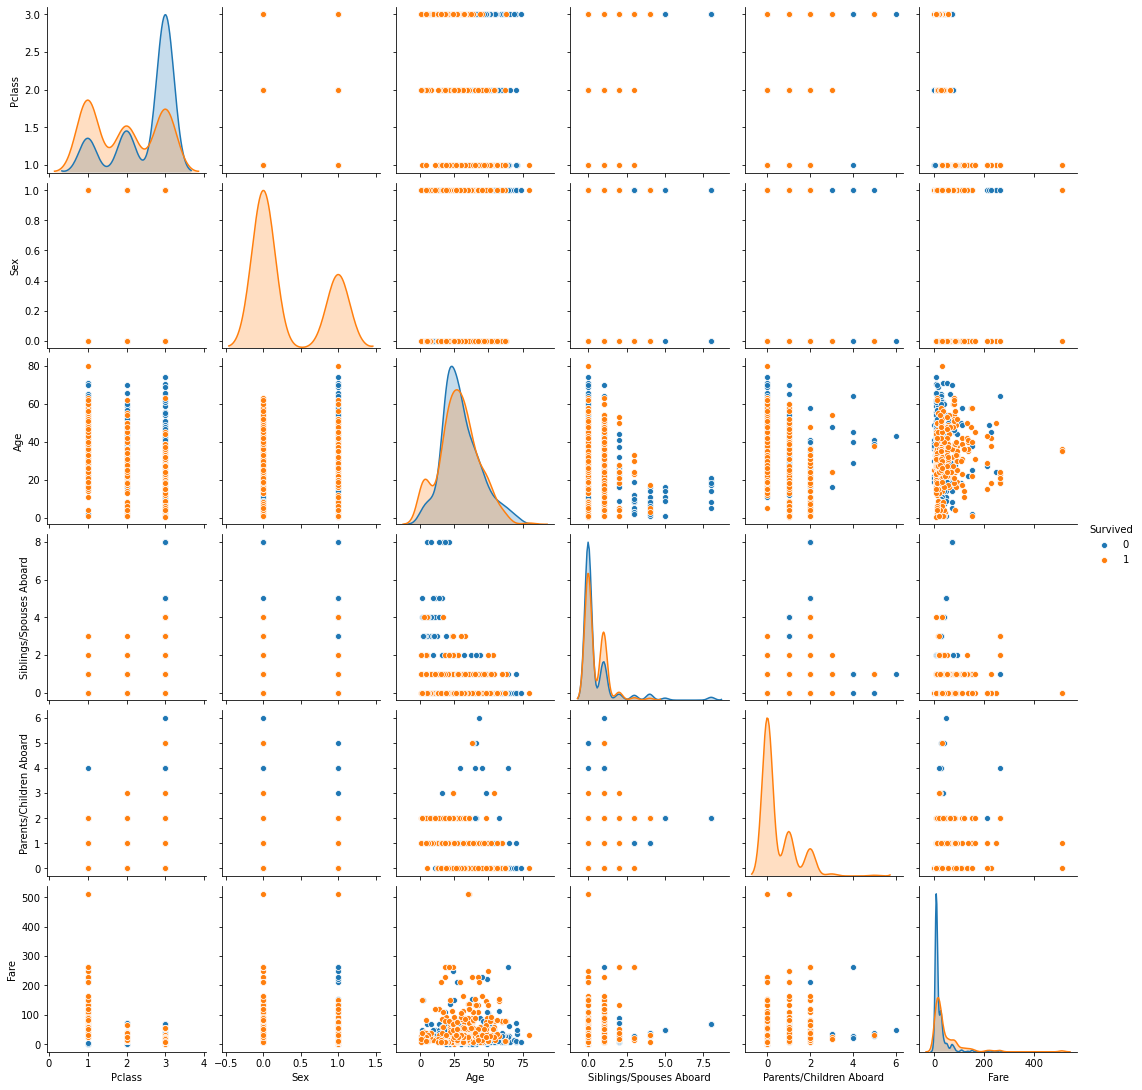

In [5]:
sns.pairplot(titanic, hue='Survived');

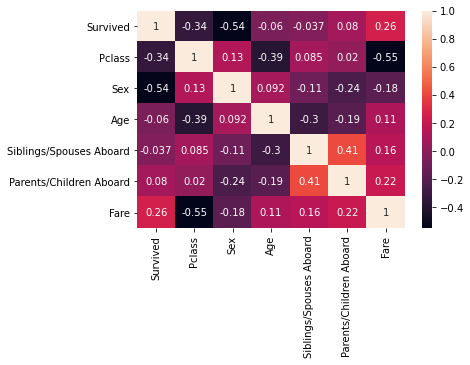

In [5]:
sns.heatmap(titanic.corr(), annot=True);

In [22]:
X.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [40]:
# Separating the data into X, y
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.5)

# Scaling the "Age" and "Fare" columns
scaler = StandardScaler()
X_train[:,[2]] = scaler.fit_transform(X_train[:,[2]])
X_train[:,[5]] = scaler.fit_transform(X_train[:,[5]])
X_test[:,[2]] = scaler.fit_transform(X_test[:,[2]])
X_test[:,[5]] = scaler.fit_transform(X_test[:,[5]])

---
# Decision Tree Classifier

DT seems suitable for this problem since the correlations between "survival" - "pclass" and "survival" - "sex" are relatively good.

In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Alive', 'Dead']))

              precision    recall  f1-score   support

       Alive       0.84      0.81      0.83       276
        Dead       0.71      0.74      0.72       168

    accuracy                           0.79       444
   macro avg       0.77      0.78      0.77       444
weighted avg       0.79      0.79      0.79       444



In [45]:
from sklearn.model_selection import cross_val_score

# Checking cross validation scores with cv=5
scores = cross_val_score(dtc, X, y, cv=5)
print('Accuracy:', dtc.score(X_test, y_test))
print(scores)

Accuracy: 0.786036036036036
[0.71910112 0.79213483 0.79661017 0.80225989 0.81355932]


Cross validation is to separate the data in different orders in order to get less biased data set eventually. We see that we have got a good score(~78.6% accuracy) in the above. However, it is not the best one.

---
# VPI model

Best accuracy: 0.8040540540540541


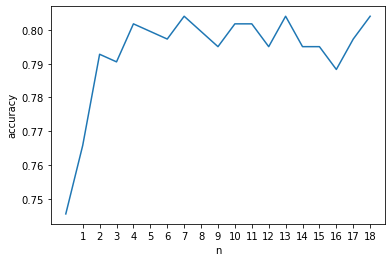

In [42]:
import vpi
import importlib
importlib.reload(vpi)
from vpi import *

accs = list()
for i in range(1,20):
    y_pred = vpi(X_test, X_train, y_train, n=i)
    acc = 0
    for j in range(len(y_pred)):
        if int(np.round(y_pred[j])) == y_test[j]:
            acc += 1
    accs.append(acc / len(y_pred))
print('Best accuracy:', max(accs))
plt.xlabel('n')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,20,1))
plt.plot(accs);

In [43]:
y_pred = vpi(X_test, X_train, y_train, n=7)
y_pred = [int(np.round(y)) for y in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       276
           1       0.73      0.73      0.73       168

    accuracy                           0.80       444
   macro avg       0.78      0.78      0.78       444
weighted avg       0.80      0.80      0.80       444

